## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

以ResNet50訓練Cifar-10

In [0]:
# 上傳檔案至colab
from google.colab import files
upload = files.upload()

Saving resnet_builder.py to resnet_builder.py


In [0]:
!ls

resnet_builder.py  sample_data


In [0]:
import os

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
from keras.datasets import cifar10
from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet 函數
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
# 讀取資料集並作前處理
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.
x_test = x_test / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170500096/170498071 [==============================] - 9s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# 建立 ResNet 模型
model = resnet(input_shape=(32,32,3)) 
model.summary()

W0807 04:18:18.220499 140004203689856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 04:18:18.541202 140004203689856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 04:18:18.551784 140004203689856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0807 04:18:18.600004 140004203689856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0807 04:18:18.601950

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 30 # 訓練整個資料集共 30個循環

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0807 04:18:39.566425 140004203689856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 04:18:40.174959 140004203689856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 49s 986us/step - loss: 1.8019 - acc: 0.5266 - val_loss: 1.6868 - val_acc: 0.5419
Epoch 2/30
50000/50000 [==============================] - 40s 797us/step - loss: 1.3150 - acc: 0.6677 - val_loss: 1.4385 - val_acc: 0.6067
Epoch 3/30
50000/50000 [==============================] - 40s 791us/step - loss: 1.1055 - acc: 0.7288 - val_loss: 1.3161 - val_acc: 0.6646
Epoch 4/30
50000/50000 [==============================] - 39s 789us/step - loss: 0.9672 - acc: 0.7720 - val_loss: 1.2160 - val_acc: 0.6881
Epoch 5/30
50000/50000 [==============================] - 39s 781us/step - loss: 0.8816 - acc: 0.7991 - val_loss: 1.4853 - val_acc: 0.6201
Epoch 6/30
50000/50000 [==============================] - 39s 782us/step - loss: 0.8156 - acc: 0.8211 - val_loss: 1.2733 - val_acc: 0.6997
Epoch 7/30
50000/50000 [==============================] - 39s 780us/step - loss: 0.7620 - acc: 0.8403 - val_loss: 1.

In [0]:
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

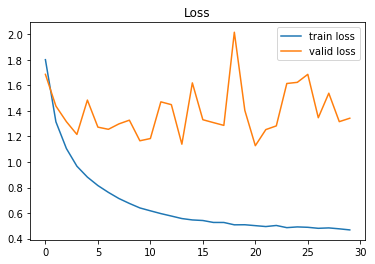

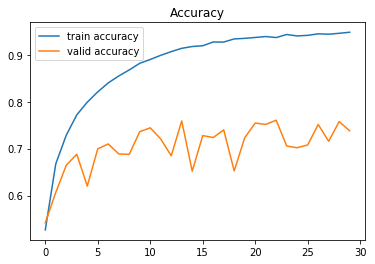

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Test

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
from keras.datasets import cifar10

# 讀取資料集並作前處理
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.
x_test = x_test / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [25]:
# 確認資料shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [36]:
from google.colab import files
upload = files.upload()

Saving resnet_builder.py to resnet_builder (1).py


In [0]:
import keras
from keras.datasets import cifar10
from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet 函數
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [38]:
# 建立 ResNet 模型
keras.backend.clear_session() # 把舊的 Graph 清掉
model = resnet(input_shape=(32,32,3)) 
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
epochs = 50 # 訓練整個資料集共 50個循環

results = {}
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [40]:
#透過資料擴增, 可以提升準確度
augment_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
model.fit_generator(
        augment_generator.flow(x_train, y_train, batch_size=batch_size),
        steps_per_epoch=int(len(x_train)/batch_size), # 一個 epochs 要執行幾次 update，通常是資料量除以 batch size
        epochs=epochs,
        verbose=1, #verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
        validation_data=(x_test, y_test))

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
    

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/50
781/781 [==============================] - 55s 70ms/step - loss: 1.8959 - acc: 0.4875 - val_loss: 1.9324 - val_acc: 0.5011
Epoch 2/50
781/781 [==============================] - 48s 61ms/step - loss: 1.4140 - acc: 0.6254 - val_loss: 1.6431 - val_acc: 0.5686
Epoch 3/50
781/781 [==============================] - 47s 61ms/step - loss: 1.2260 - acc: 0.6786 - val_loss: 1.4333 - val_acc: 0.6305
Epoch 4/50
781/781 [==============================] - 47s 60ms/step - loss: 1.0999 - acc: 0.7179 - val_loss: 1.6669 - val_acc: 0.5743
Epoch 5/50
781/781 [==============================] - 47s 60ms/step - loss: 1.0087 - acc: 0.7468 - val_loss: 1.1086 - val_acc: 0.7191
Epoch 6/50
781/781 [==============================] - 47s 60ms/step - loss: 0.9475 - acc: 0.7661 - val_loss: 1.1504 - val_acc: 0.7231
Epoch 7/50
781/781 [==============================] - 46s 59ms/step - loss: 0.8955 - acc: 0.7820 - val_loss: 1.1213 - val_acc: 0.7286
Epoch 8/50
781/781 [==============================] - 46s 59ms

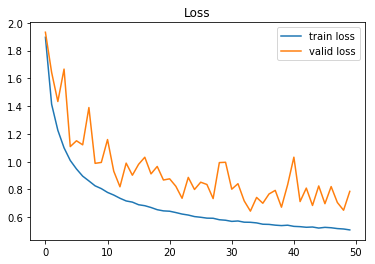

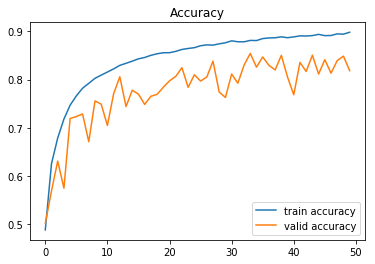

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [0]:
# ignore
"""
include_top = False
把 ResNet50 的最後一層拔掉
my_new_model.layers[0].trainable = False
模型前面的 ResNet50 是不訓練的
"""
num_classes = 10

my_new_model = Sequential()
my_new_model.add(ResNet50(input_shape=(32, 32, 3),weights='imagenet', pooling='avg', include_top = False))
my_new_model.add(Dense(num_classes, activation='softmax'))
my_new_model.layers[0].trainable = False

In [0]:
# 編譯模型(優化模型的方法(optimizer)為：隨機梯度下降法 (Stochastic gradient descent, SGD)，loss function 為 cross-entropy)
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])